<a href="https://colab.research.google.com/github/sskamalapurkar/Supervised_ML_Classification_Capstone_Project/blob/main/Credit_card_default_prediction_Sayali_Kamalapurkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

---



## **This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments**

# **Data Description**


---
**Attribute Information:**

**This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:**

**X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit**

**X2: Gender (1 = male; 2 = female)**

**X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others; 5 = unknown; 6 = unknown)**

**X4: Marital status (1 = married; 2 = single; 3 = others)**

**X5: Age (year)**

**X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:** 

X6 = the repayment status in September, 2005

X7 = the repayment status in August, 2005

X8 = the repayment status in August, 2005

X9 = the repayment status in August, 2005

X10 = the repayment status in August, 2005

X11 = the repayment status in April, 2005

**The measurement scale for the repayment status is: -2 = No consumption; -1 = pay duly; 0 = use of revolving credit (paid minimum only); 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.**

**X12-X17: Amount of bill statement (NT dollar)** 

X12 = amount of bill statement in September, 2005

X13 = amount of bill statement in August, 2005

X14 = amount of bill statement in September, 2005

X15 = amount of bill statement in September, 2005

X16 = amount of bill statement in September, 2005

X17 = amount of bill statement in April, 2005

**X18-X23: Amount of previous payment (NT dollar)**

X18 = amount paid in September, 2005

X19 = amount paid in August, 2005

X20 = amount paid in August, 2005

X21 = amount paid in August, 2005

X22 = amount paid in August, 2005

X23 = amount paid in April, 2005

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
from numpy import math
from datetime import datetime

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing ML Models for classification 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing dataset
file_path = '/content/drive/MyDrive/Supervised ML - Classification/default of credit card clients.xls'
DataFrame = pd.read_excel(file_path, skiprows = 1)
df = DataFrame.copy()

In [ ]:
# let us have a glance at the dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#Checking number of rows and columns
df.shape

(30000, 25)

There are 30000 rows and 25 columns in this dataset.

In [ ]:
# printing names of all the columns / features
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# getting info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

Here we see, there are column names which are not giving meanning to the data, they need explanation other than column name. So, firstly we will rename such columns in the dataset.

In [ ]:
df = df.rename(columns={'LIMIT_BAL':'cred_lim','SEX':'gender','PAY_0':'repay_status_sep','PAY_2':'repay_status_aug','PAY_3':'repay_status_jul',
                        'PAY_4':'repay_status_jun','PAY_5':'repay_status_may','PAY_6':'repay_status_apr','BILL_AMT1':'sep_bill',
                        'BILL_AMT2':'aug_bill','BILL_AMT3':'jul_bill','BILL_AMT4':'jun_bill','BILL_AMT5':'may_bill','BILL_AMT6':'apr_bill',
                        'PAY_AMT1':'sep_paid_amt','PAY_AMT2':'aug_paid_amt','PAY_AMT3':'jul_paid_amt','PAY_AMT4':'jun_paid_amt',
                        'PAY_AMT5':'may_paid_amt','PAY_AMT6':'apr_paid_amt','default payment next month':'default'})
df.head()


,ID,cred_lim,gender,EDUCATION,MARRIAGE,AGE,repay_status_sep,repay_status_aug,repay_status_jul,repay_status_jun,...,jun_bill,may_bill,apr_bill,sep_paid_amt,aug_paid_amt,jul_paid_amt,jun_paid_amt,may_paid_amt,apr_paid_amt,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


There are some categorical columns such as - gender, education, marriage, default etc. which are having numerical values in the corresponding columns. Before doing Exploratory Data Analysis on these columns, we will convert those values in the textual data so that we can easily understand and visualize the patterns through EDA.

In [ ]:
#checking for unique values in the columns 'gender', 'education', 'marriage' and 'default'
df.nunique()

ID                  30000
cred_lim               81
gender                  2
EDUCATION               7
MARRIAGE                4
AGE                    56
repay_status_sep       11
repay_status_aug       11
repay_status_jul       11
repay_status_jun       11
repay_status_may       10
repay_status_apr       10
sep_bill            22723
aug_bill            22346
jul_bill            22026
jun_bill            21548
may_bill            21010
apr_bill            20604
sep_paid_amt         7943
aug_paid_amt         7899
jul_paid_amt         7518
jun_paid_amt         6937
may_paid_amt         6897
apr_paid_amt         6939
default                 2
dtype: int64

In [ ]:
# renaming values in the categorical columns for better understanding of the data through EDA
df['gender'].replace({1:'Male',2:'Female'},inplace = True)
df['MARRIAGE'].replace({1:'Married',2:'Single',3:'others', 0: 'others'},inplace = True)
df['EDUCATION'].replace({1:'graduate_school',2:'university',3:'high_school',4:'others',5:'others',6:'others', 0:'others'}, inplace = True)
df['default'].replace({0:'No',1:'Yes'}, inplace = True)
df.head()

,ID,cred_lim,gender,EDUCATION,MARRIAGE,AGE,repay_status_sep,repay_status_aug,repay_status_jul,repay_status_jun,...,jun_bill,may_bill,apr_bill,sep_paid_amt,aug_paid_amt,jul_paid_amt,jun_paid_amt,may_paid_amt,apr_paid_amt,default
0,1,20000,Female,university,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,Female,university,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,Female,university,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,Female,university,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,Male,university,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


Let us now check for null values and further details about the dataset.

In [ ]:
df.isnull().sum()

ID                  0
cred_lim            0
gender              0
EDUCATION           0
MARRIAGE            0
AGE                 0
repay_status_sep    0
repay_status_aug    0
repay_status_jul    0
repay_status_jun    0
repay_status_may    0
repay_status_apr    0
sep_bill            0
aug_bill            0
jul_bill            0
jun_bill            0
may_bill            0
apr_bill            0
sep_paid_amt        0
aug_paid_amt        0
jul_paid_amt        0
jun_paid_amt        0
may_paid_amt        0
apr_paid_amt        0
default             0
dtype: int64

As we can see, there are no null values in any of the columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                30000 non-null  int64 
 1   cred_lim          30000 non-null  int64 
 2   gender            30000 non-null  object
 3   EDUCATION         30000 non-null  object
 4   MARRIAGE          30000 non-null  object
 5   AGE               30000 non-null  int64 
 6   repay_status_sep  30000 non-null  int64 
 7   repay_status_aug  30000 non-null  int64 
 8   repay_status_jul  30000 non-null  int64 
 9   repay_status_jun  30000 non-null  int64 
 10  repay_status_may  30000 non-null  int64 
 11  repay_status_apr  30000 non-null  int64 
 12  sep_bill          30000 non-null  int64 
 13  aug_bill          30000 non-null  int64 
 14  jul_bill          30000 non-null  int64 
 15  jun_bill          30000 non-null  int64 
 16  may_bill          30000 non-null  int64 
 17  apr_bill    

In [ ]:
df.describe()

,ID,cred_lim,AGE,repay_status_sep,repay_status_aug,repay_status_jul,repay_status_jun,repay_status_may,repay_status_apr,sep_bill,...,jul_bill,jun_bill,may_bill,apr_bill,sep_paid_amt,aug_paid_amt,jul_paid_amt,jun_paid_amt,may_paid_amt,apr_paid_amt
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [ ]:
df.describe(include = 'object')

,gender,EDUCATION,MARRIAGE,default
count,30000,30000,30000,30000
unique,2,4,3,2
top,Female,university,Single,No
freq,18112,14030,15964,23364


# **Duplicate Values:**

Why is it important to remove duplicate records from my data?

> "Duplication" means that we have repeated data in our dataset. This could be due to things like data entry errors or data collection methods. By removing duplicate values in our data set, time and money are saved by not sending identical communications multiple times to the same person.





In [ ]:
# checking for duplicate Values in the dataset
duplicates=len(df[df.duplicated()])
print("The number of duplicate values in the dataset is = ",duplicates)

The number of duplicate values in the dataset is =  0


There are no duplicate values as well. We are ready to explore and visualize the features with target variable.

# **EDA on features**

---




# **Univariate Analysis**

---



In [ ]:
# Let us check proportion of dependent variable, default in next month
default_df = df['default'].value_counts()
default_df

No     23364
Yes     6636
Name: default, dtype: int64

Text(0.5, 1.0, 'Proportion of defaulters vs non-defaulters')

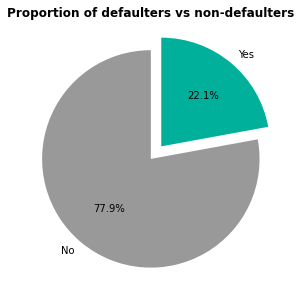

In [ ]:
# let's plot pie chart of above data
plt.figure(figsize=(8,5))
plt.pie(default_df, labels = ['No', 'Yes'], autopct='%1.1f%%',explode = [0, 0.15], startangle=90,colors =['#999999', '#00b09b'])
plt.title("Proportion of defaulters vs non-defaulters", weight = 'bold')    #giving title to the chart

From the pie chart, we can easily identify that the credit card default dataset is highly unbalanced. We will deal with this after our EDA is done. By using SMOTE overfitting method, we will balance the dataset for defaulters and non defaulters.

In [ ]:
# Let us check proportion of discrete independent variables in the dataset
independent_columns_1 = ['gender', 'EDUCATION', 'MARRIAGE', 'repay_status_sep',
       'repay_status_aug', 'repay_status_jul', 'repay_status_jun', 'repay_status_may', 'repay_status_apr']

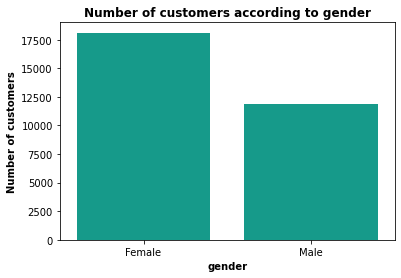

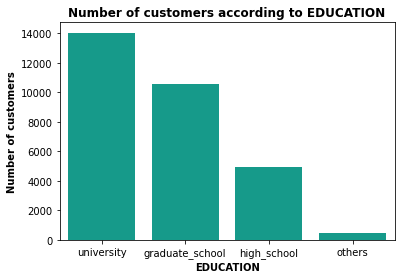

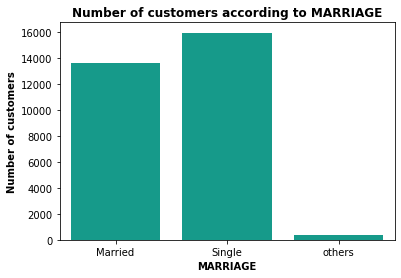

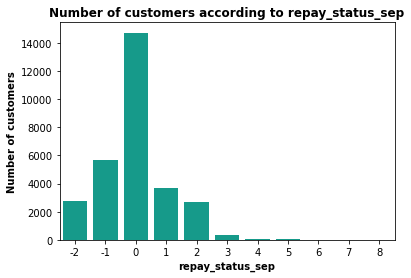

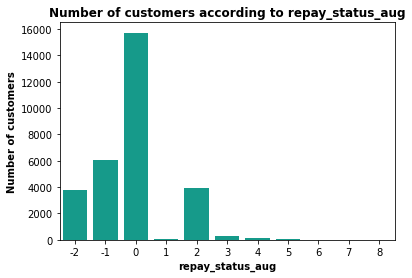

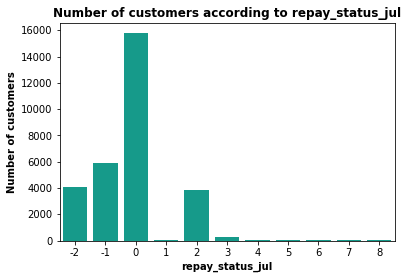

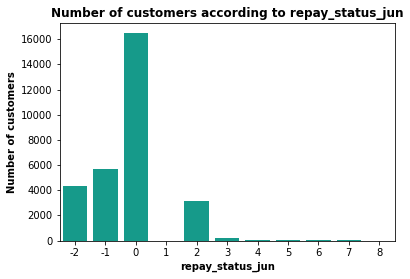

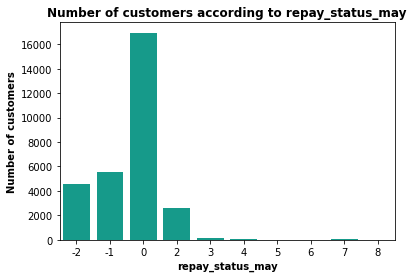

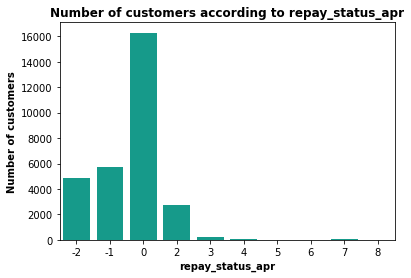

In [ ]:
for col in independent_columns_1:
  sns.countplot(x = col, data = df, color = '#00b09b')
  plt.title(f"Number of customers according to {col}", weight = 'bold')
  plt.ylabel("Number of customers", weight = 'bold')
  plt.xlabel(f"{col}", weight = 'bold')
  plt.show()

In [ ]:
# Let us check proportion of continuous independent variables in the dataset
independent_columns_2 = ['cred_lim', 'AGE', 'sep_bill', 'aug_bill', 'jul_bill', 'jun_bill', 'may_bill', 'apr_bill', 
                         'sep_paid_amt', 'aug_paid_amt', 'jul_paid_amt', 'jun_paid_amt', 'may_paid_amt', 'apr_paid_amt']

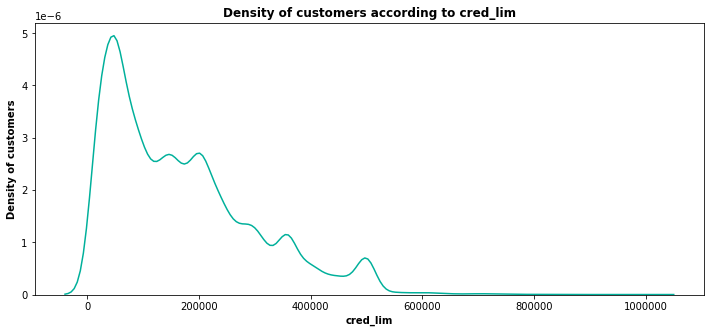

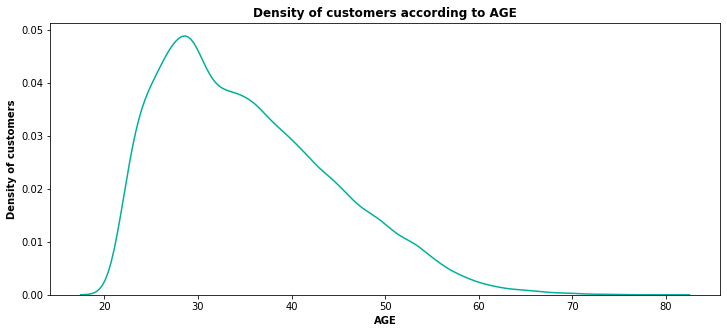

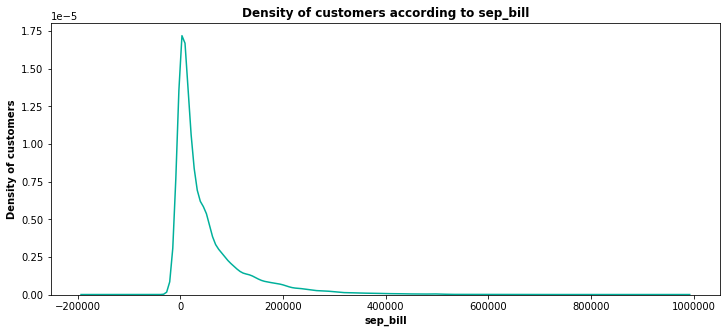

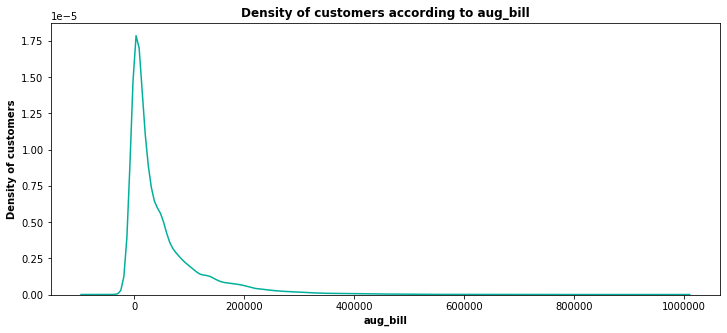

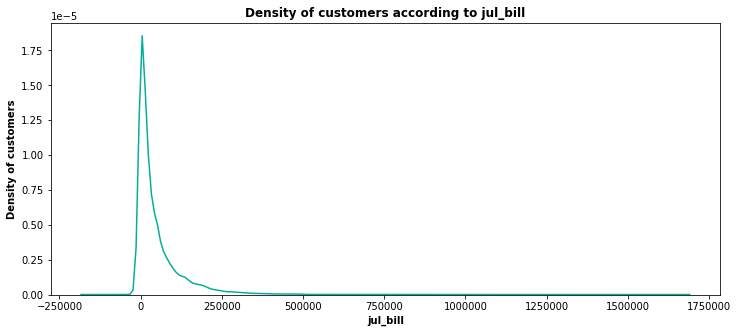

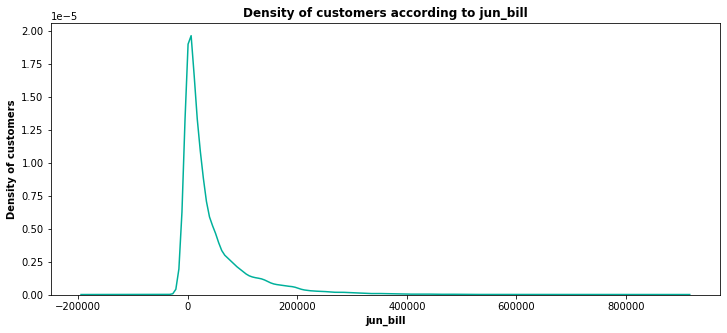

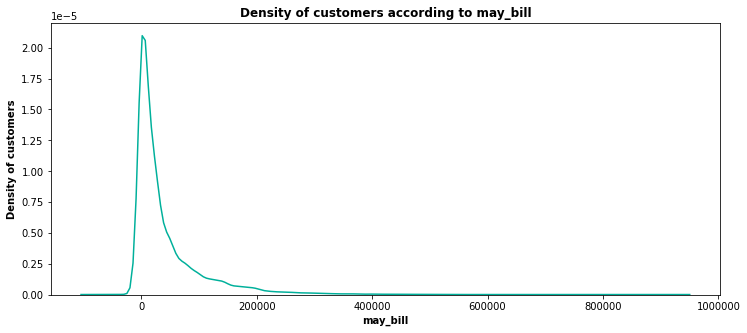

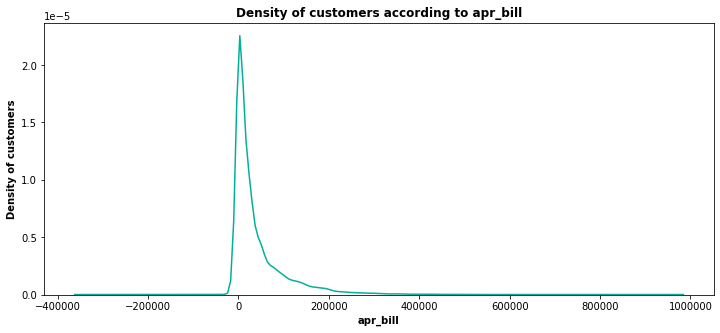

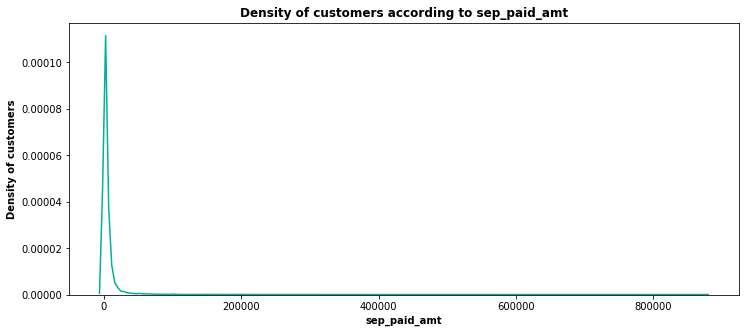

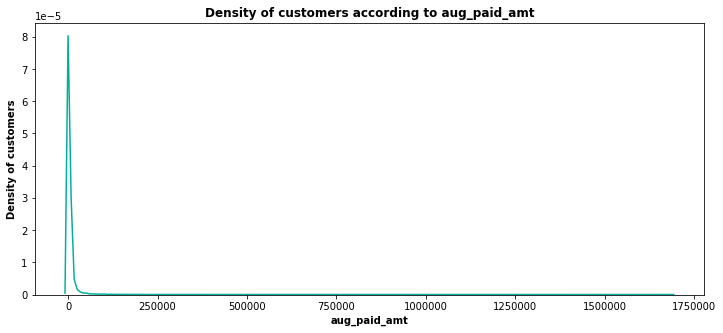

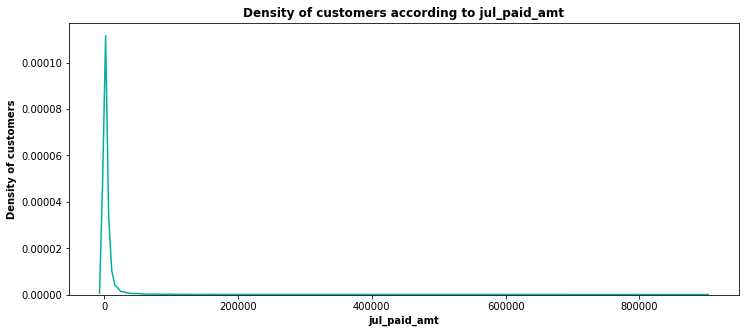

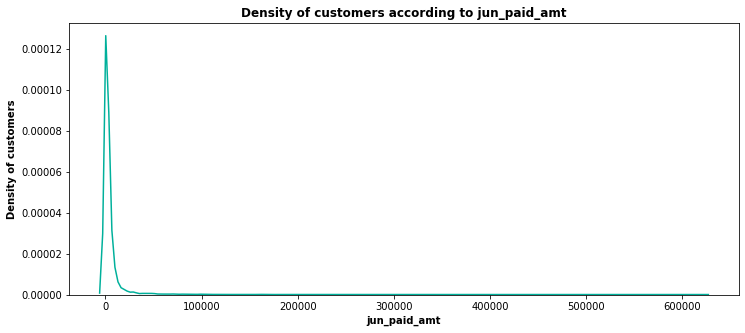

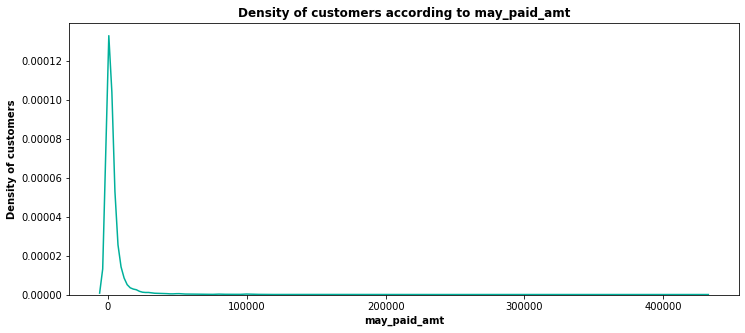

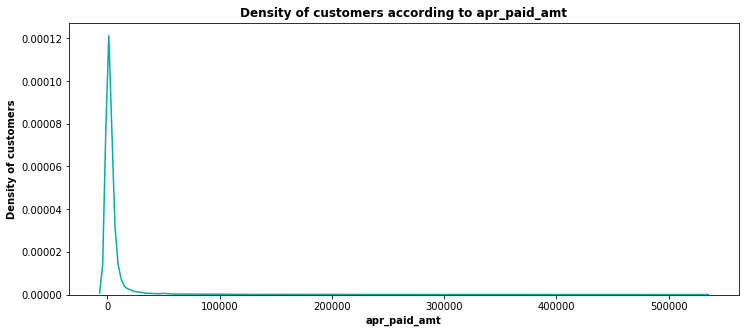

In [ ]:
for col in independent_columns_2:
  plt.figure(figsize=(12,5))
  sns.kdeplot(x = col, data = df, color = '#00b09b')
  plt.title(f"Density of customers according to {col}", weight = 'bold')
  plt.ticklabel_format(style='plain', axis='x')
  plt.ylabel("Density of customers", weight = 'bold')
  plt.xlabel(f"{col}", weight = 'bold')
  plt.show()

# **Observations of Univariate Analysis:**

---

> 1.   There are approx 22% of the customers who will default in next month.
2.   In the context of credit given to customers, there is higher percentage of female than male.
3. Most of the customers have completed university level, followed by graduate level and then high school level. Very few customers are below that level.
4. the customers who have taken credit contains mostly Single people, followed by married people.
5. Approx 6000 customers are repaying every month (not necessary same customers, count is overall), and maximum customers are repaying the minimum credit amount only. Further, there are very few customers who are delayed in payment for 3 and more than 3 months.
6. This situation, max people repaying the minimum credit amount can be seen in kde plots for density of customers according to monthwise paid amount.
7. Maximum customers (more than 70%) are in the range of credit limit 20,000 to 2,50,000.
8. It is observed that, generally customers taking credit facility are in the age group 25 to 45 years.





# **Bivariate Analysis:**

---



In [ ]:
# let us look at frequency of defaults with respect to gender
gender_df = df.groupby(['gender','default']).size().unstack()
gender_df

default,No,Yes
gender,,
Female,14349,3763
Male,9015,2873


<Figure size 864x360 with 0 Axes>

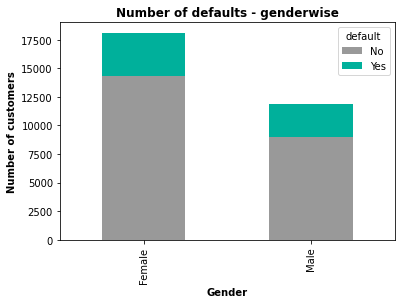

In [ ]:
#Fixing bar width for the stacked bar chart
barwidth = 0.7

#Creating a stacked bar chart
plt.figure(figsize=(12,5))
gender_df.plot(kind = 'bar', stacked = True, color =['#999999', '#00b09b'])
#giving title,legend and axes labels
plt.title("Number of defaults - genderwise", weight='bold')
plt.xlabel("Gender", weight='bold')
plt.ylabel("Number of customers",weight='bold')

plt.show()

In [ ]:
# let us look at frequency of defaults with respect to marriage status
marriage_df = df.groupby(['MARRIAGE','default']).size().unstack()
marriage_df

default,No,Yes
MARRIAGE,,
Married,10453,3206
Single,12623,3341
others,288,89


<Figure size 864x360 with 0 Axes>

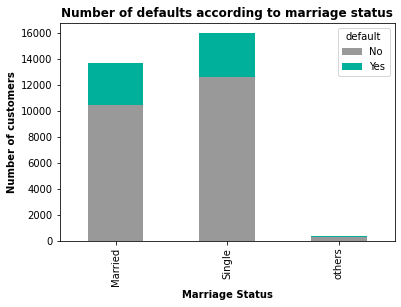

In [ ]:
#Fixing bar width for the stacked bar chart
barwidth = 0.7

#Creating a stacked bar chart
plt.figure(figsize=(12,5))
marriage_df.plot(kind = 'bar', stacked = True, color =['#999999', '#00b09b'])
        
#giving title,legend and axes labels
plt.title("Number of defaults according to marriage status", weight='bold')
plt.xlabel("Marriage Status", weight='bold')
plt.ylabel("Number of customers",weight='bold')
plt.show()

In [ ]:
# let us look at frequency of defaults with respect to marriage status
education_df = df.groupby(['EDUCATION','default']).size().unstack()
education_df

default,No,Yes
EDUCATION,,
graduate_school,8549,2036
high_school,3680,1237
others,435,33
university,10700,3330


<Figure size 864x360 with 0 Axes>

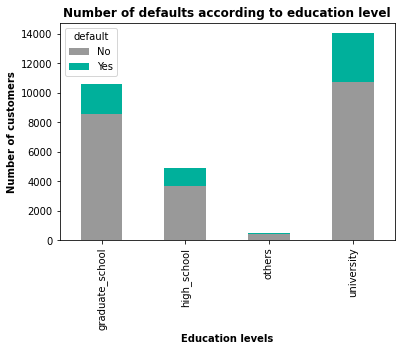

In [ ]:
#Fixing bar width for the stacked bar chart
barwidth = 0.7

#Creating a stacked bar chart
plt.figure(figsize=(12,5))
education_df.plot(kind = 'bar', stacked = True, color =['#999999', '#00b09b'])
        
#giving title,legend and axes labels
plt.title("Number of defaults according to education level", weight='bold')
plt.xlabel("Education levels", weight='bold')
plt.ylabel("Number of customers",weight='bold')
plt.show()

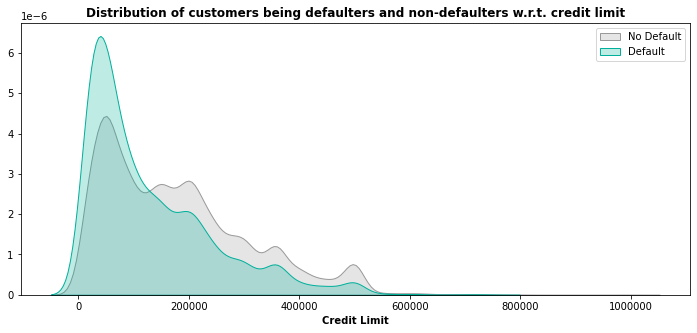

In [ ]:
# plotting density chart to understand distribution of defaulters and non-defaulters with respect to 'credit_limit'
plt.figure(figsize=(12,5))
sns.kdeplot(df.loc[(df['default'] == 'No'), 'cred_lim'], label = 'No Default', shade = True, color = '#999999')
sns.kdeplot(df.loc[(df['default'] == 'Yes'), 'cred_lim'], label = 'Default', shade = True, color = '#00b09b')
#giving title and axes labels
plt.title("Distribution of customers being defaulters and non-defaulters w.r.t. credit limit", weight = 'bold')
plt.xlabel("Credit Limit", weight = 'bold')
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel('')
plt.legend()
plt.show()

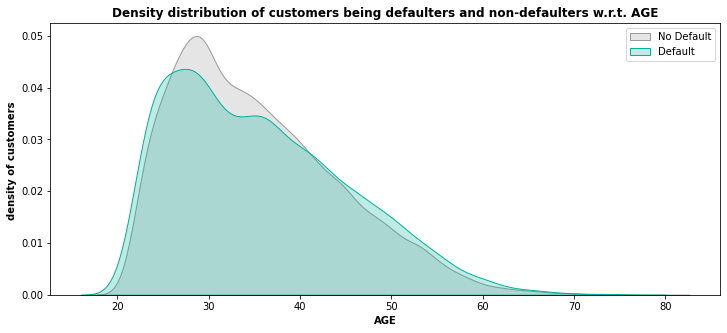

In [ ]:
#plotting density chart to understand distribution of defaulters and non-defaulters with respect to 'AGE' of the customers
plt.figure(figsize=(12,5))
sns.kdeplot(df.loc[(df['default'] == 'No'), 'AGE'], label = 'No Default', shade = True, color = '#999999')
sns.kdeplot(df.loc[(df['default'] == 'Yes'), 'AGE'], label = 'Default', shade = True, color = '#00b09b')
#giving title and axes labels
plt.title("Density distribution of customers being defaulters and non-defaulters w.r.t. AGE", weight = 'bold')
plt.xlabel("AGE", weight = 'bold')
plt.ylabel('density of customers ', weight = 'bold')
plt.legend()
plt.show()

Now, we will check if the past six months bill amount will affect the payment default next month or not:

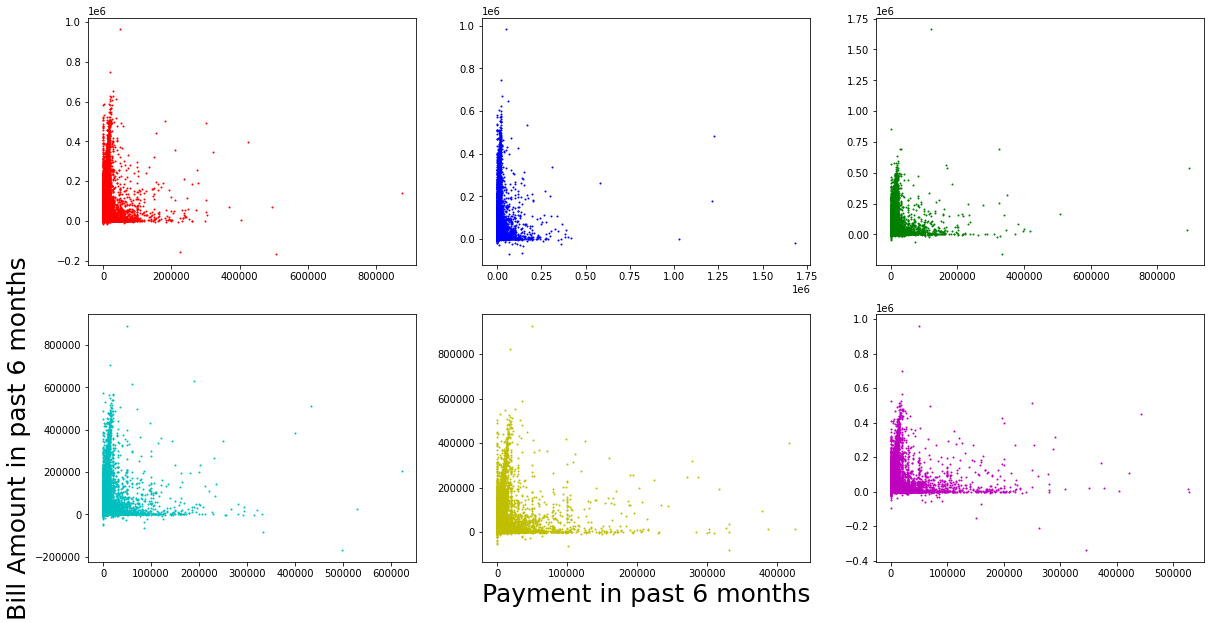

In [34]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df.sep_paid_amt, y=df.sep_bill, c='r', s=1)

plt.subplot(232)
plt.scatter(x=df.aug_paid_amt, y=df.aug_bill, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df.jul_paid_amt, y=df.jul_bill, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df.jun_paid_amt, y=df.jun_bill, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=df.may_paid_amt, y=df.may_bill, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=df.apr_paid_amt, y=df.apr_bill, c='m', s=1)

plt.show()


Above plot indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low. This we can infer since maximum number of datapoints are closely packed along the Y-axis near to 0 on X-axis.